<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 5

By: Brian Du, Kenneth Marenco, and Zach Starr

### Problem 0 (3 points)

## Part 1: Logistic and Cross Entropy

### Problem 1.1 (Exam Style)

If we take the cross-entropy loss defined above and for every instance of p plug in our logistic function $f(a)$ we get the following:

$$
l_{xe}(y,f(a))  = y log(\frac{1}{1+e^{-a}} ) + (1-y) log(1 - \frac{1}{1+e^{-a}})
$$
$$
l(y, a) =  l_{xe}(y,f(a)) = y log(1+e^{-a}) + (1-y) log(1+e^{a})
$$

### Problem 1.2 (Exam Style)
$$
l^{'}(y,a) = y \frac{1}{1+e^{-a}}(-e^{-a}) + (1-y)\frac{1}{1+e^a}(e^a)
$$
$$
l^{'}(y,a) = -\frac{ye^{-a}}{1+e^{-a}} + (1-y)\frac{e^a}{1+e^a}
$$
$$
l^{''}(y,a) = -y\frac{-e^{-a}(1+e^{-a})+e^{-a}(-e^{-a})}{(1+e^{-a})^2} 
+ (1-y)\frac{e^a(1+e^a)-(1+e^a)(e^a)}{(1+e^a)^2}
$$
$$
l^{''}(y,a) = y\frac{2e^{-a}}{(1+e^{-a})^2}
$$

From the second derivative $l^{''}$, we know that $l(y,a)$ is a convex function because $l^{''}$ is always positive $y = 1$ or 0 for $y = 0$ meaning that any critical point will be a minimum for $l(y,a)$.

### Problem 1.3

Text(0.5, 0.98, 'Cross Entropy Loss and its derivatives')

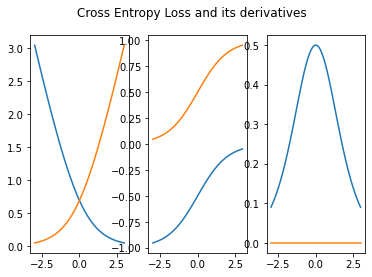

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def l_1(a):
    return np.log(1+np.exp(-a))
def l_0(a):
    return np.log(1+np.exp(a))
def lprime_1(a):
    return -np.exp(-a)/(1+np.exp(-a))
def lprime_0(a):
    return np.exp(a)/(1+np.exp(a))
def lprimeprime_1(a):
    return (2*np.exp(-a))/((1+np.exp(-a)) **2)
def lprimeprime_0(a):
    return 0*a
myactivation = np.linspace(-3, 3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(myactivation, l_1(myactivation))
ax1.plot(myactivation, l_0(myactivation))
ax2.plot(myactivation, lprime_1(myactivation))
ax2.plot(myactivation, lprime_0(myactivation))
ax3.plot(myactivation, lprimeprime_1(myactivation))
ax3.plot(myactivation, lprimeprime_0(myactivation))
plt.suptitle('Cross Entropy Loss and its derivatives')
#plt.plot(myactivation, l_0(myactivation))

    

## Part 2: Automatic Differentiation 

In [2]:
import autograd.numpy as anp
from autograd import grad

### Problem 2.1

Text(0.5, 0.98, 'Cross Entropy Loss and its Derivatives')

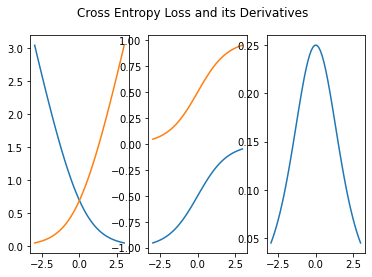

In [3]:
import matplotlib.pyplot as plt

def l_1(a):
    return anp.log(1+anp.exp(-a))
def l_0(a): 
    return anp.log(1+anp.exp(a))


dl_1 = grad(l_1)
dl_0 = grad(l_0)
dl_2 = grad(dl_0)

myactivation = anp.linspace(-3,3)

fig,(ax1, ax2, ax3) = plt.subplots(1,3)
ax1.plot(myactivation, l_1(myactivation))
ax1.plot(myactivation, l_0(myactivation))
ax2.plot(myactivation, [dl_1(i) for i in myactivation])
ax2.plot(myactivation, [dl_0(i) for i in myactivation])
ax3.plot(myactivation, [dl_2(i) for i in myactivation])

plt.suptitle('Cross Entropy Loss and its Derivatives')


## Part 3: Logistic Regression Classifiers 

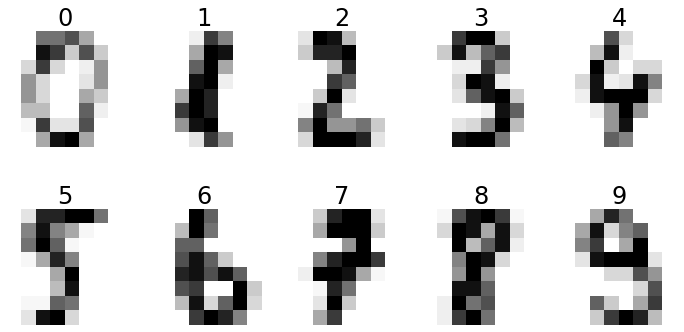

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

file_name = 'digits.pkl'
with open(file_name, 'rb') as file:
    sets = pickle.load(file)
training_set, test_set = sets['training'], sets['test']


plt.figure(figsize=(12, 6))
for digit in range(10):
    plt.subplot(2, 5, digit+1)
    index = np.argwhere(training_set['y'] == digit)[0][0]
    plt.imshow(training_set['x'][index].reshape((8, 8)), cmap='Greys')
    plt.axis('off')
    plt.title('{}'.format(digit), fontsize=24)
plt.show()

In [5]:
def evaluate(h, train, test, name):
    def error_rate(predictor, samples):
        x, y = samples['x'], samples['y']
        return (1 - predictor.score(x, y)) * 100
    
    f = '{:s}: training error rate is {:.4f} percent on {} samples,' + \
        '\n\ttest error rate is {:.4f} percent on {} samples'
    info = (name, error_rate(h, train), len(train['y']), error_rate(h, test), len(test['y']))
    print(f.format(*info))

### Problem 3.1
In the end, Training error would be zero, test error would be non-zero.

In [6]:
from sklearn import linear_model

log_reg = linear_model.LogisticRegression(C=1e5, random_state=0, solver='lbfgs', max_iter=10000)
h = log_reg.fit(training_set['x'], training_set['y'])

evaluate(h, training_set, test_set, 'logistic-regression classifier')

logistic-regression classifier: training error rate is 0.0000 percent on 1078 samples,
	test error rate is 3.6161 percent on 719 samples


### Problem 3.2 (Exam Style)

Yes, we can tell from this experiment whether or not the training set is linearly seperable. The training data is linearly separable since the error was zero.

### Problem 3.3 (Exam Style)

No, we cannot tell from 3.1. But, we could tell by copying code from 3.1 and instead of evaluating on training data we can evaluate on test data by swapping variables.

Test error would equal zero and training error would be non-zero. Thus, the test set would be linearly separable.

In [7]:
log_reg2 = linear_model.LogisticRegression(C=1e5, random_state=0, solver='lbfgs', max_iter=10000)
g = log_reg2.fit(training_set['x'], training_set['y'])
#g = log_reg2.fit(test_set['x'], test_set['y'])

evaluate(g, test_set, training_set, 'logistic-regression classifier')

logistic-regression classifier: training error rate is 3.6161 percent on 719 samples,
	test error rate is 0.0000 percent on 1078 samples


### Problem 3.4 (Exam Style)

Yes, the model will be overfitting because training error would be zero and the test error would be non-zero and therefore higher than our training error. This overfits the data because if training error is zero, we likely cannot generalize about new data.

### Problem 3.5

[[69  0  1  0  0  0  0  0  0  0]
 [ 0 67  0  0  1  0  0  1  0  0]
 [ 0  0 79  1  0  0  0  0  0  0]
 [ 0  0  2 76  0  0  0  0  1  1]
 [ 0  0  0  0 53  0  0  2  0  1]
 [ 0  0  1  0  0 71  0  0  0  0]
 [ 0  2  0  0  0  0 78  0  1  0]
 [ 1  0  0  1  0  0  0 75  0  0]
 [ 0  2  0  0  0  0  1  0 59  3]
 [ 0  0  0  1  0  0  0  0  2 66]]


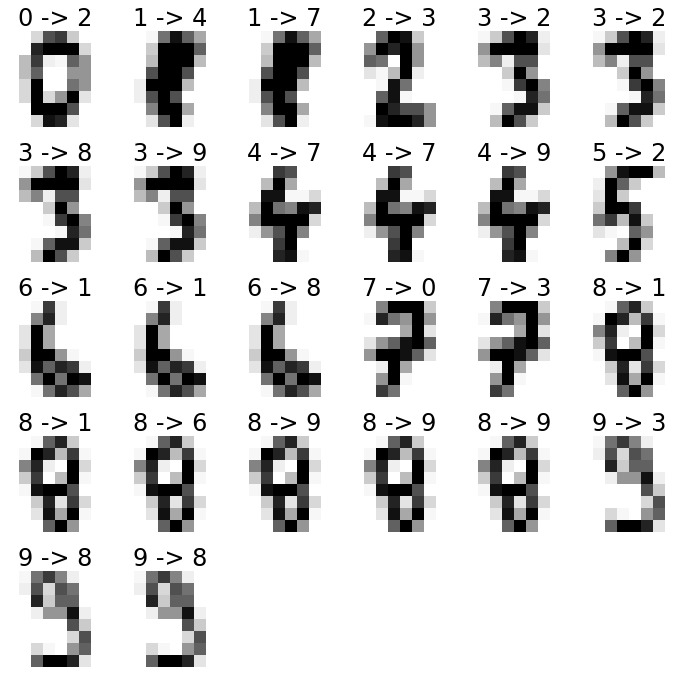

In [8]:
from sklearn.metrics import confusion_matrix

predicted_labels = h.predict(test_set['x'])
conf_matrix = confusion_matrix(test_set['y'], predicted_labels)
print(conf_matrix)

plt.figure(figsize=(12, 12))
count = 0
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[0])):
        if (i != j and conf_matrix[i][j] > 0):
            for k in range(conf_matrix[i][j]):                
                count += 1
                if count <= 30:
                    plt.subplot(5, 6, count)
                    index = np.argwhere(test_set['y'] == i)[0][0]
                    plt.imshow(test_set['x'][index].reshape((8, 8)), cmap='Greys')
                    plt.axis('off')
                    plt.title('{:d} -> {:d}'.format(i, j), fontsize=24)
plt.show()
if count > 30:
    print('there are {:d} more misclassifed images left'.format(count-30))


### Problem 3.6 (Exam Style)

The 1->4 (top left) would be very difficult for a human to classify, but the 9->8 (bottom left) would be very easy for a human to classify. 